In [1]:
%run RD_HERS_HETDEX_base_functions.ipynb

In [2]:
path_hers_maps = os.path.join(os.environ['MAPSPATH'],'Herschel','SPT')

hers_maps = {'combined':
             {'PSW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_PSW',
              'PMW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_PMW',
              'PLW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_PLW'
             }, 
             'jk1':
             {'PSW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half1_PSW',
              'PMW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half1_PMW',
              'PLW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half1_PLW'
             }, 
             'jk2':
             {'PSW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half2_PSW',
              'PMW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half2_PMW',
              'PLW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half2_PLW'
             }, 
            }

In [3]:
class MapObject():
    maps={}
    masks={}
    headers={}
    pix_sizes_arcsec={}
    def __init__(self, base_path, jack_dict):
        for jack, map_dict in jack_dict.items():
            self.maps[jack]={}
            self.masks[jack]={}
            self.headers[jack]={}
            self.pix_sizes_arcsec[jack]={}
            for key, map_name in map_dict.items():
                map_path = os.path.join(base_path, map_name+'.fits')
                try:
                    map_in, hd_in = fits.getdata(map_path, 0, header=True)
                except:
                    map_in, hd_in = fits.getdata(map_path, 1, header=True)
                try:
                    pix_arcsec = hd_in['CDELT2']*3600
                except:
                    pix_arcsec = hd_in['CD2_2']*3600  
                self.maps[jack][key] = map_in
                self.headers[jack][key] = hd_in
                self.pix_sizes_arcsec[jack][key] = pix_arcsec

                mask_in=np.ones_like(map_in)
                mask_in[np.isnan(map_in)]=0
                map_in[np.isnan(map_in)]=0
                self.masks[jack][key] = mask_in

In [4]:
hers_obj = MapObject(path_hers_maps, hers_maps)

In [5]:
name='PSW'
hers = hers_obj.maps['combined'][name]
hers_mask = hers_obj.masks['combined'][name]
hers_mask_jk1 = hers_obj.masks['jk1'][name]
hers_mask_jk2 = hers_obj.masks['jk2'][name]
hd_hers = hers_obj.headers['combined'][name]
pix_arcsec = hers_obj.pix_sizes_arcsec['combined'][name]
print('pixel size = {0:0.2f} arcsec'.format(pix_arcsec))
dims = np.shape(hers_mask_jk1)
fsky = (np.product(dims) * (pix_arcsec / 3600 / 180 * np.pi)**2) / (4 * np.pi)
deltal = get_map_native_deltal(hers, pix_arcsec)
print('delta ell = {0:0.2f}'.format(deltal))

pixel size = 15.00 arcsec
delta ell = 27.88


(2976, 3228)


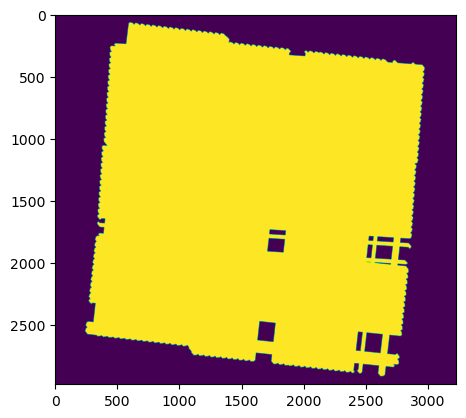

In [6]:
plt.imshow(hers_mask_jk1);
print(np.shape(hers_mask_jk1))

(2976, 3228)


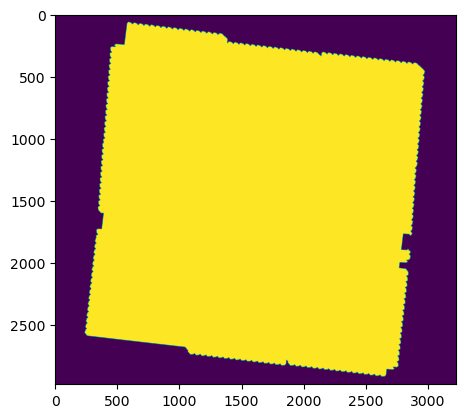

In [7]:
plt.imshow(hers_mask_jk2);
print(np.shape(hers_mask_jk2))

In [8]:
k_psw=get_k_from_map(hers,pix_arcsec)

(2976, 3228)


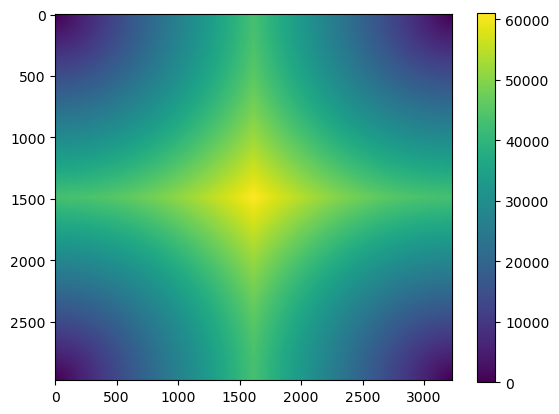

In [9]:
plt.imshow(k_psw);
plt.colorbar();
print(np.shape(k_psw))

# Test recovery of input power spetrum

In [10]:
print(pix_arcsec)
print(deltal)

15.000000782328
27.876003238628904


In [15]:
#deltal=100
width = 1.0
#ell_bins = get_ell_bins(hers_mask_jk1, pix_arcsec, deltal=deltal, width=width)
tst_ell, tst_pk_nomask = get_mc_mkk(hers_mask_jk1, hers_mask_jk2, pix_arcsec, deltal=deltal, width=width, nomask=False)

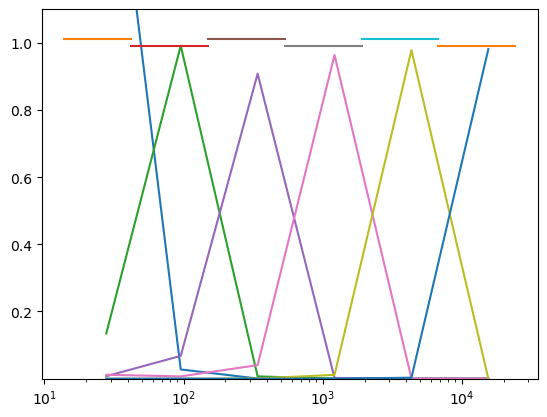

In [16]:
zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims)
fudge_factor = 1/((pix_arcsec/3600 * (np.pi/180))**2 * (dims[0]*dims[1])) / zero_factor
ell_out = (tst_ell[:-1]+tst_ell[1:])/2
for i in range(len(ell_out)):
    plt.plot(ell_out, fudge_factor*tst_pk_nomask[i]);
    yh = 1+0.01*(-1)**i
    plt.plot([tst_ell[i],tst_ell[i+1]],[yh,yh])
    plt.xscale('log')
    #plt.yscale('log')
    #plt.xlim([25,50000])    
    plt.ylim([1e-8,1.1])

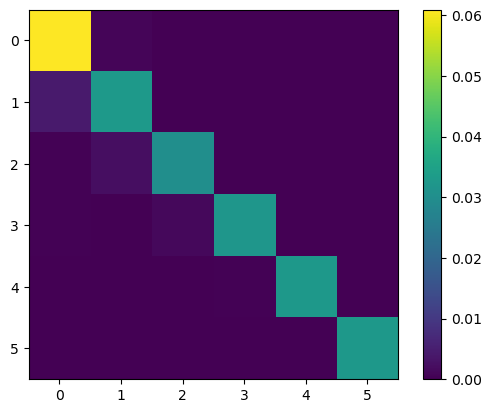

In [18]:
plt.imshow(tst_pk_nomask)
plt.colorbar()

In [19]:
fudge_factor

30.107912141639698

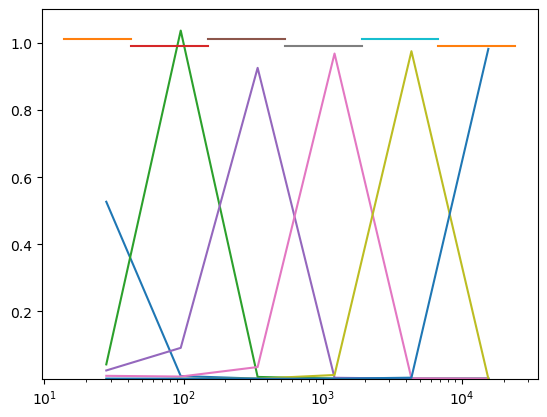

In [72]:
zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims)
fudge_factor = 1/((pix_arcsec/3600 * (np.pi/180))**2 * (dims[0]*dims[1])) / zero_factor
ell_out = (tst_ell[:-1]+tst_ell[1:])/2
for i in range(len(ell_out)):
    plt.plot(ell_out, fudge_factor*tst_pk_nomask[i]);
    yh = 1+0.01*(-1)**i
    plt.plot([tst_ell[i],tst_ell[i+1]],[yh,yh])
    plt.xscale('log')
    #plt.yscale('log')
    #plt.xlim([25,50000])    
    plt.ylim([1e-8,1.1])

In [84]:
tst = np.random.randn(100,100)

In [85]:
tst

array([[-0.92286555,  2.26046255,  1.23830467, ...,  0.17350582,
         0.45486038,  1.64299571],
       [ 0.6733897 , -0.37666717,  0.11130954, ...,  0.19357561,
        -0.29603617,  0.02280055],
       [ 0.76920001,  0.04148063, -0.8263565 , ..., -1.30121165,
        -0.63890174, -0.95380184],
       ...,
       [-1.48866965, -0.7082146 , -0.55558602, ..., -1.1478547 ,
        -0.00652982,  2.50414669],
       [ 0.46380358,  0.24263858, -0.84010537, ...,  1.05401884,
        -0.59501492, -1.42122886],
       [-1.26623276, -0.9900236 , -0.47998066, ..., -0.72989412,
         0.11321017,  0.74379673]])

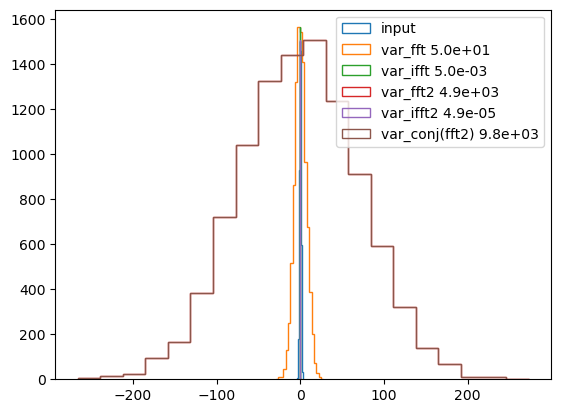

In [116]:
plt.hist(np.ravel(tst),bins=20, histtype='step',label='input');
plt.hist(np.ravel(np.real(np.fft.fft(tst))),bins=20, histtype='step',label='var_fft {0:0.1e}'.format(np.var(np.real(np.fft.fft(tst)))));
plt.hist(np.ravel(np.real(np.fft.ifft(tst))),bins=20, histtype='step',label='var_ifft {0:0.1e}'.format(np.var(np.real(np.fft.ifft(tst)))));
plt.hist(np.ravel(np.real(np.fft.fft2(tst))),bins=20, histtype='step',label='var_fft2 {0:0.1e}'.format(np.var(np.real(np.fft.fft2(tst)))));
plt.hist(np.ravel(np.real(np.fft.ifft2(tst))),bins=20, histtype='step',label='var_ifft2 {0:0.1e}'.format(np.var(np.real(np.fft.ifft2(tst)))));
plt.hist(np.ravel(np.conj(np.fft.fft2(tst))),bins=20, histtype='step',label='var_conj(fft2) {0:0.1e}'.format(np.var(np.conj(np.fft.fft2(tst)))));
plt.legend();

In [126]:
np.real(np.fft.ifft2(tst))

array([[-2.15229260e-02,  6.71818628e-03,  3.87387899e-03, ...,
         5.99380473e-03,  3.87387899e-03,  6.71818628e-03],
       [-1.62277395e-02,  7.71455435e-03, -8.26100926e-03, ...,
         1.00285365e-02,  1.18820498e-02,  3.19569955e-03],
       [-1.52943535e-02,  8.33168664e-03, -9.41283396e-03, ...,
        -1.65937152e-02, -9.35808198e-03,  9.58095723e-03],
       ...,
       [ 4.46793783e-03,  4.05258888e-03,  8.26670181e-03, ...,
        -9.87534556e-04,  1.51675478e-03, -1.73798970e-04],
       [-1.52943535e-02,  9.58095723e-03, -9.35808198e-03, ...,
        -4.91046653e-05, -9.41283396e-03,  8.33168664e-03],
       [-1.62277395e-02,  3.19569955e-03,  1.18820498e-02, ...,
        -6.31445260e-03, -8.26100926e-03,  7.71455435e-03]])

In [20]:
sc.real(sc.fft.ifft2(tst))

NameError: name 'sc' is not defined

TypeError: 'module' object is not callable

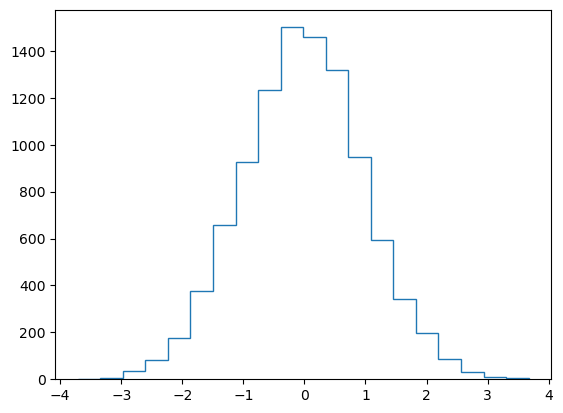

In [118]:
import scipy as sc
plt.hist(np.ravel(tst),bins=20, histtype='step',label='input');
plt.hist(np.ravel(np.real(sc.fft(tst))),bins=20, histtype='step',label='var_fft {0:0.1e}'.format(np.var(np.real(sc.fft(tst)))));
plt.legend();

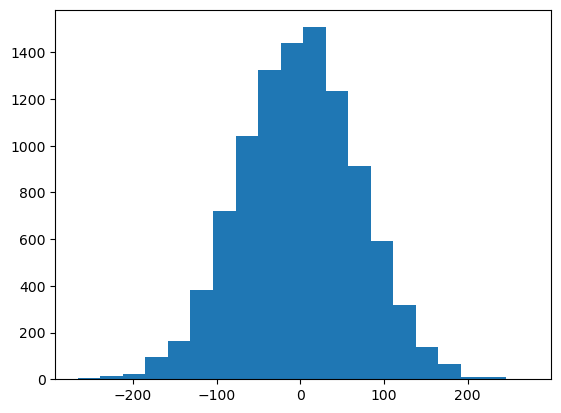

In [94]:
plt.hist(np.ravel(np.real(np.fft.fft2(tst))),bins=20);

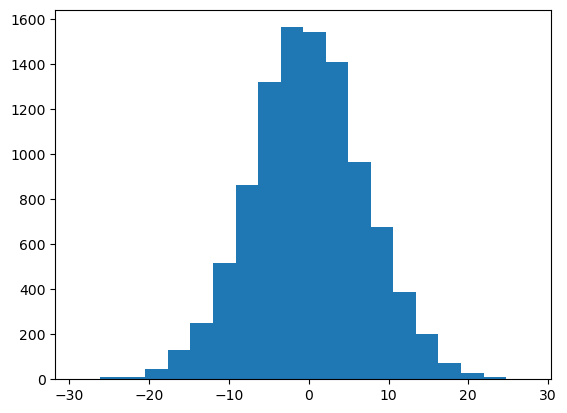

In [95]:
plt.hist(np.ravel(np.real(np.fft.fft(tst))),bins=20);